In [125]:
# !pip install mglearn
# !pip install -U ipywidgets
# !pip install category_encoders

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats, display, HTML
import os
from ipywidgets import interact,widgets
# add the new created feature
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,KBinsDiscretizer
import category_encoders as ce
# plt.style.use('seaborn-colorblind')
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
from helpers import explore, missing_data as ms,outlier as ot, encoding as enc



In [59]:
data = pd.read_csv('./files/Zelestra-temperature-forecasting-train.csv')

In [3]:
@interact
def get_data(records=(0, len(data), 50)):
    return data.head(records)


interactive(children=(IntSlider(value=28000, description='records', max=56000, step=50), Output()), _dom_class…

### Get dtypes for each columns

In [4]:
str_var_list, num_var_list, all_var_list = explore.get_dtypes(data=data)
print(str_var_list) # string type
print(num_var_list) # numeric type
print(all_var_list) # all

['Datetime', 'SO2_concentration', 'O3_concentration', 'CO_concentration']
['ID', 'City_ID', 'Particulate_matter', 'NO2_concentration', 'Presure', 'Dew_point', 'Precipitation', 'Anonymous_X1', 'Wind_speed', 'Moisture_percent', 'Temperature']
['Datetime', 'SO2_concentration', 'O3_concentration', 'CO_concentration', 'ID', 'City_ID', 'Particulate_matter', 'NO2_concentration', 'Presure', 'Dew_point', 'Precipitation', 'Anonymous_X1', 'Wind_speed', 'Moisture_percent', 'Temperature']


In [5]:
explore.describe(data=data,output_path=r'./output/')

result saved at: ./output/describe.csv


,ID,Datetime,City_ID,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature
count,56000.000000,56000,56000.000000,55340.000000,56000,55198,56000,56000.000000,56000.000000,56000.000000,56000.000000,55784.000000,56000.000000,56000.000000,56000.000000
unique,NaN,28002,NaN,NaN,20760,903,53407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,-80,NaN,NaN,$3650#8,2,$3600#8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,54,NaN,NaN,47,4074,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,31521.500000,NaN,0.500000,110.548066,NaN,NaN,NaN,143.438337,1012.431143,1.940343,0.055943,49.601420,1.899418,45.653169,13.578780
std,19296.643919,NaN,0.500004,95.174784,NaN,NaN,NaN,76.744127,10.121543,13.731029,0.687729,24.989324,1.324907,17.302524,11.251614
min,0.000000,NaN,0.000000,2.000000,NaN,NaN,NaN,2.000000,987.100000,-35.300000,0.000000,0.000000,0.000000,15.000000,-16.779000
25%,13999.750000,NaN,0.000000,39.000000,NaN,NaN,NaN,80.367500,1004.275000,-9.200000,0.000000,31.020000,1.000000,32.940000,3.446750
50%,31521.500000,NaN,0.500000,88.000000,NaN,NaN,NaN,153.380000,1012.100000,2.100000,0.000000,49.520000,1.500000,44.100000,14.531000
75%,49043.250000,NaN,1.000000,152.000000,NaN,NaN,NaN,210.780000,1020.600000,14.500000,0.000000,67.190000,2.500000,59.332500,23.045000


In [6]:
@interact
def get_data_null(column_name=all_var_list):
    if column_name =="Datetime":
        data[column_name] = pd.to_datetime(data[column_name], errors="coerce")
    else:
        data[column_name] = pd.to_numeric(data[column_name], errors="coerce")
    return explore.data_isnull(data=data,column_name=column_name,output_path=r'./output/')

interactive(children=(Dropdown(description='column_name', options=('Datetime', 'SO2_concentration', 'O3_concen…

In [7]:
data.loc[data['Datetime'].isnull()]

,ID,Datetime,City_ID,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature
659,659,NaT,0,32.0,78.94,72,960.06,60.22,1018.6,-13.2,0.0,4.39,2.0,36.81,9.433
695,695,NaT,0,73.0,60.65,28,1177.84,71.57,1019.4,-7.3,0.0,28.32,1.5,55.49,3.959
949,949,NaT,0,20.0,122.82,104,2088.93,123.03,1016.3,-9.6,0.0,39.20,5.1,37.94,12.223
1365,1365,NaT,0,67.0,183.01,108,3808.59,155.10,1004.9,-4.3,0.0,60.66,2.8,36.96,17.809
2713,2713,NaT,0,38.0,190.31,110,4030.73,175.25,1004.4,15.9,0.0,53.89,1.4,19.55,23.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52560,59604,NaT,1,105.0,82.12,4,890.18,52.70,1033.5,-6.2,0.0,30.20,1.2,78.66,-1.576
53562,60606,NaT,1,45.0,35.46,14,921.64,23.70,1031.2,-14.0,0.0,15.38,0.5,65.77,-6.943
54048,61092,NaT,1,93.0,22.08,40,1713.41,72.24,1024.0,-13.7,0.0,26.76,2.2,59.19,4.295
54893,61937,NaT,1,18.0,125.9,108,2205.91,95.98,1022.2,-12.4,0.0,20.34,2.5,55.37,13.916


In [8]:
data= data.loc[data['Datetime'].isnull()==False]

In [9]:
data["Month"]=data["Datetime"].dt.month
data["Year"]=data["Datetime"].dt.year

In [10]:
data.head(50)

,ID,Datetime,City_ID,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature,Month,Year
0,0,2017-01-01 14:00:00,0,14.0,40.12,85,600.14,38.55,1024.5,-21.4,0.0,1.15,5.7,62.84,-0.323,1,2017
1,1,2017-01-01 15:00:00,0,12.0,65.59,84,2082.38,96.09,1025.1,-22.1,0.0,2.24,3.9,79.45,-0.570,1,2017
2,2,2017-01-01 16:00:00,0,6.0,58.87,83,1475.88,111.09,1025.3,-24.6,0.0,45.70,5.3,83.44,-1.008,1,2017
3,3,2017-01-01 17:00:00,0,5.0,84.67,84,2448.53,67.59,1026.2,-25.5,0.0,15.90,4.9,81.27,-1.234,1,2017
4,4,2017-01-01 18:00:00,0,5.0,83.66,77,2224.61,95.86,1027.1,-24.5,0.0,31.30,3.2,81.93,-1.704,1,2017
5,5,2017-01-01 19:00:00,0,3.0,21.69,77,2481.99,55.21,1027.5,-21.3,0.0,23.70,2.4,69.01,-2.222,1,2017
6,6,2017-01-01 20:00:00,0,4.0,76,62,577.18,55.86,1028.2,-20.4,0.0,23.39,2.2,69.91,-2.381,1,2017
7,7,2017-01-01 21:00:00,0,7.0,23.99,48,1980.23,86.75,1029.5,-20.4,0.0,38.53,3.0,72.48,-1.316,1,2017
8,8,2017-01-01 22:00:00,0,6.0,51.71,46,742.59,111.49,1030.4,-21.2,0.0,28.94,4.6,82.66,-0.136,1,2017
9,9,2017-01-01 23:00:00,0,14.0,53.9,68,2405.1,116.58,1030.5,-23.3,0.0,29.75,5.5,40.24,0.489,1,2017


interactive(children=(Dropdown(description='x_value', options=('Year', 'Month'), value='Year'), Dropdown(descr…

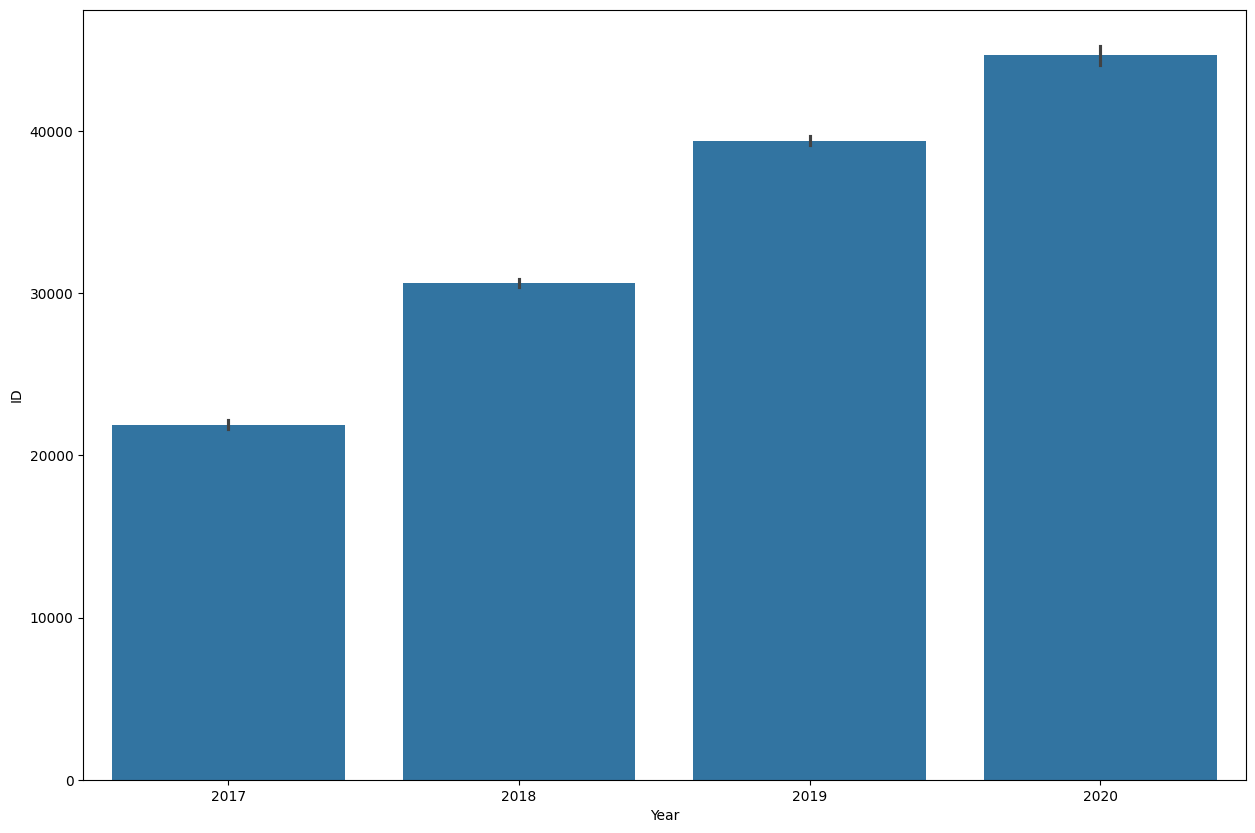

In [11]:
@interact
def get_discrete_var_barplot(x_value=['Year','Month'],y_value=num_var_list):
    return explore.discrete_var_barplot(x=x_value,y=y_value,data=data,output_path='./output/')

interactive(children=(Dropdown(description='x_value', options=('Year', 'Month'), value='Year'), Output()), _do…

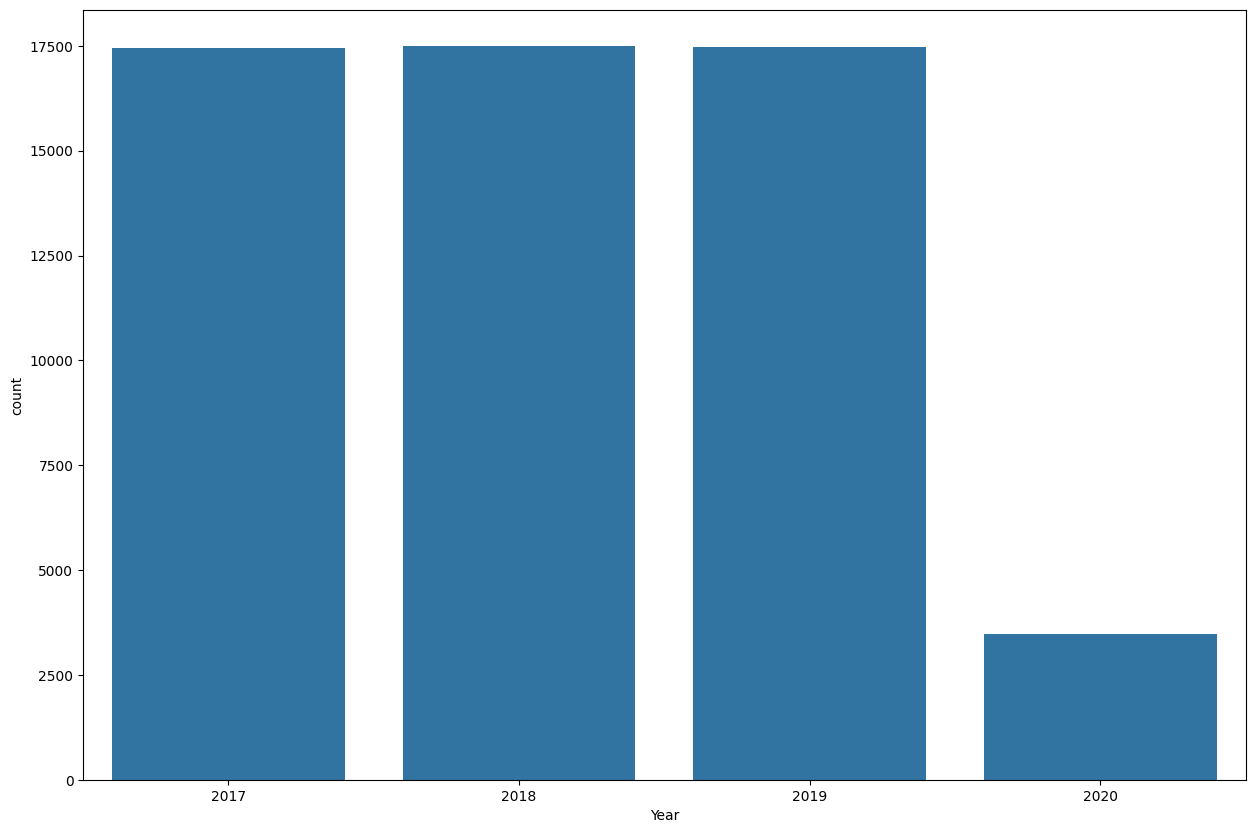

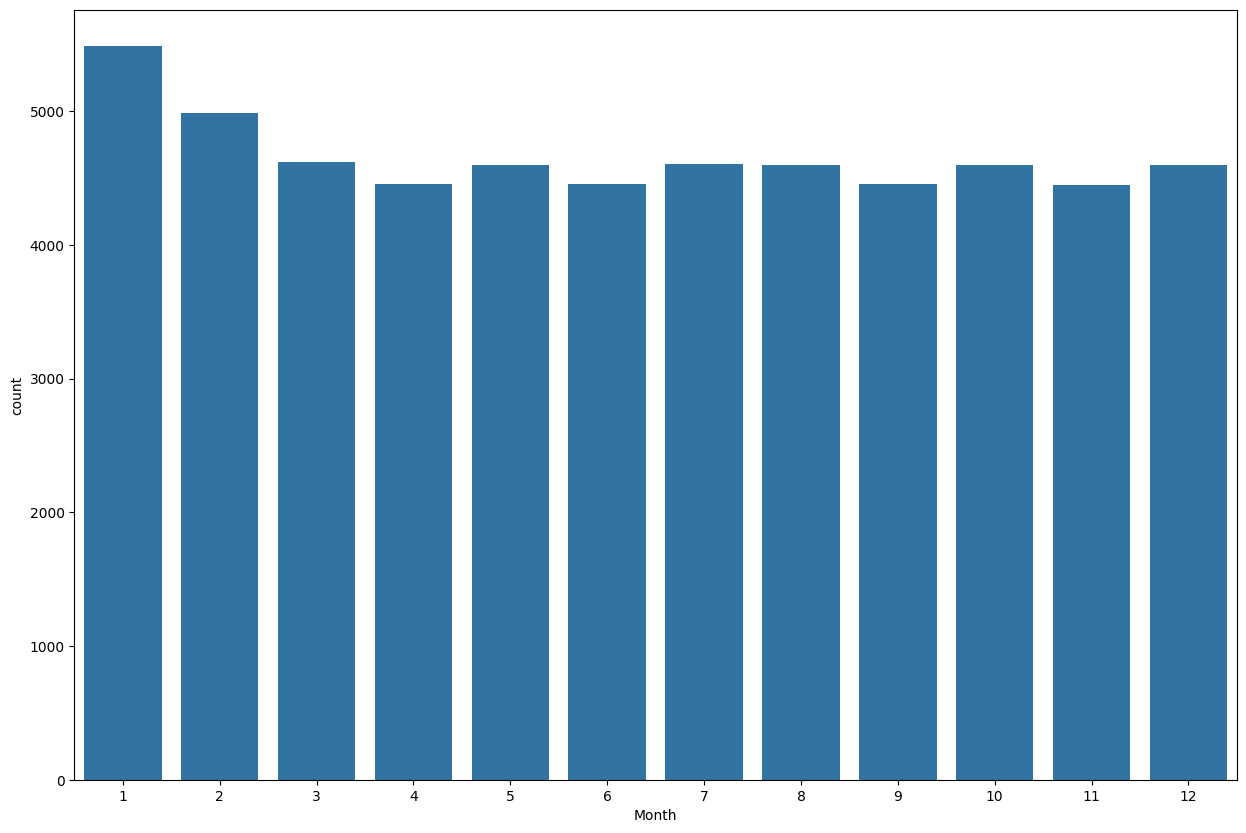

In [12]:
@interact
def get_discrete_var_countplot(x_value=['Year','Month']):
    return explore.discrete_var_countplot(x=x_value,data=data,output_path='./output/')  
# explore.discrete_var_countplot(x='Year',data=data,output_path='./output/')

interactive(children=(Dropdown(description='x_value', options=('Year', 'Month'), value='Year'), Dropdown(descr…

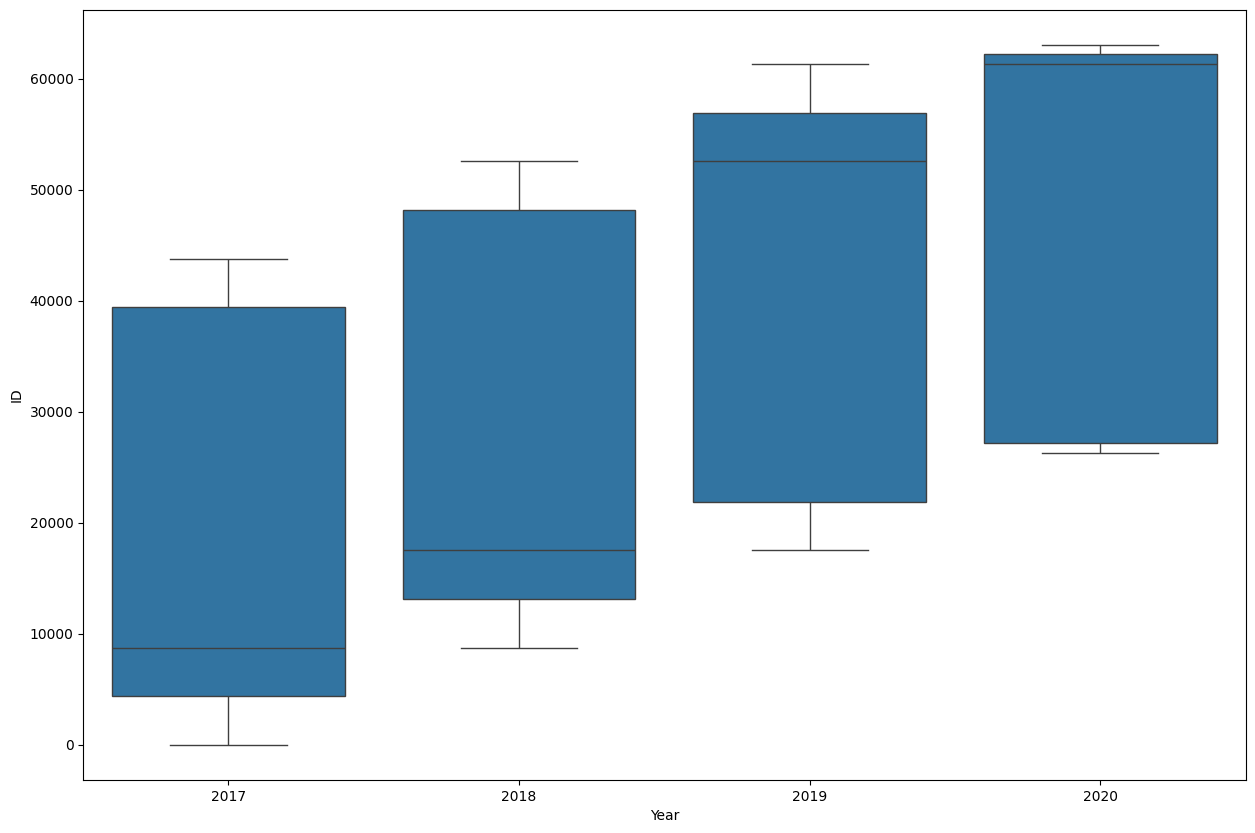

In [13]:
@interact
def get_discrete_var_boxplot(x_value=['Year','Month'],y_value=num_var_list):
    return explore.discrete_var_boxplot(x=x_value,y=y_value,data=data,output_path='./output/')


In [14]:
# @interact
# def get_continuous_var_distplot(x_value=num_var_list):
#     return explore.continuous_var_distplot(x=x_value,output_path='./output/')


interactive(children=(Dropdown(description='x_value', options=('Month', 'Year'), value='Month'), Dropdown(desc…

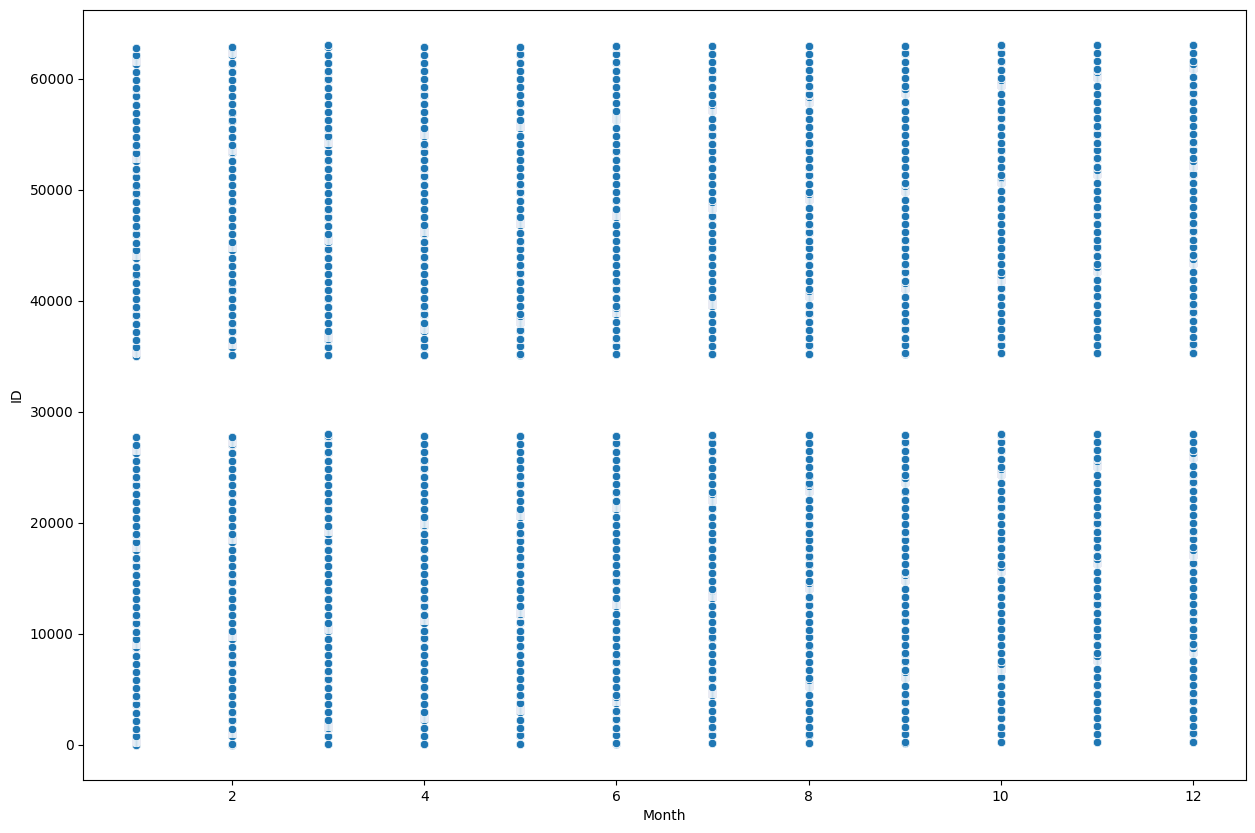

In [15]:
@interact
def get_scatter_plot(x_value=["Month","Year"],y_value=num_var_list):
    return explore.scatter_plot(x=x_value,y=y_value,data=data,output_path='./output/')


Image saved at ./output/Corr_plot.png


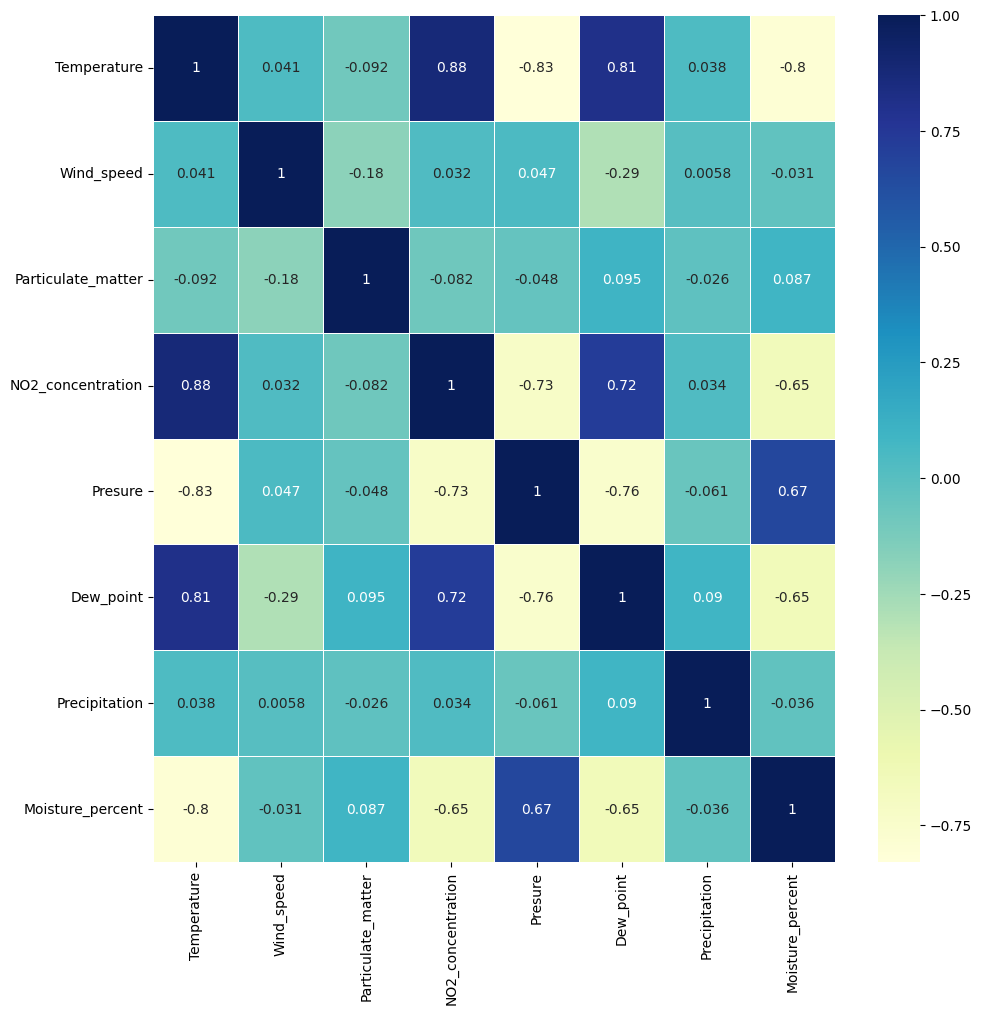

In [16]:

explore.correlation_plot(data=data[['Temperature','Wind_speed','Particulate_matter','NO2_concentration','Presure','Dew_point','Precipitation','Moisture_percent']],output_path='./output/')
# explore.correlation_plot(data=data.drop(['Datetime','ID','SO2_concentration','O3_concentration'],axis='columns'),output_path='./output/')

interactive(children=(Dropdown(description='value', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_conce…

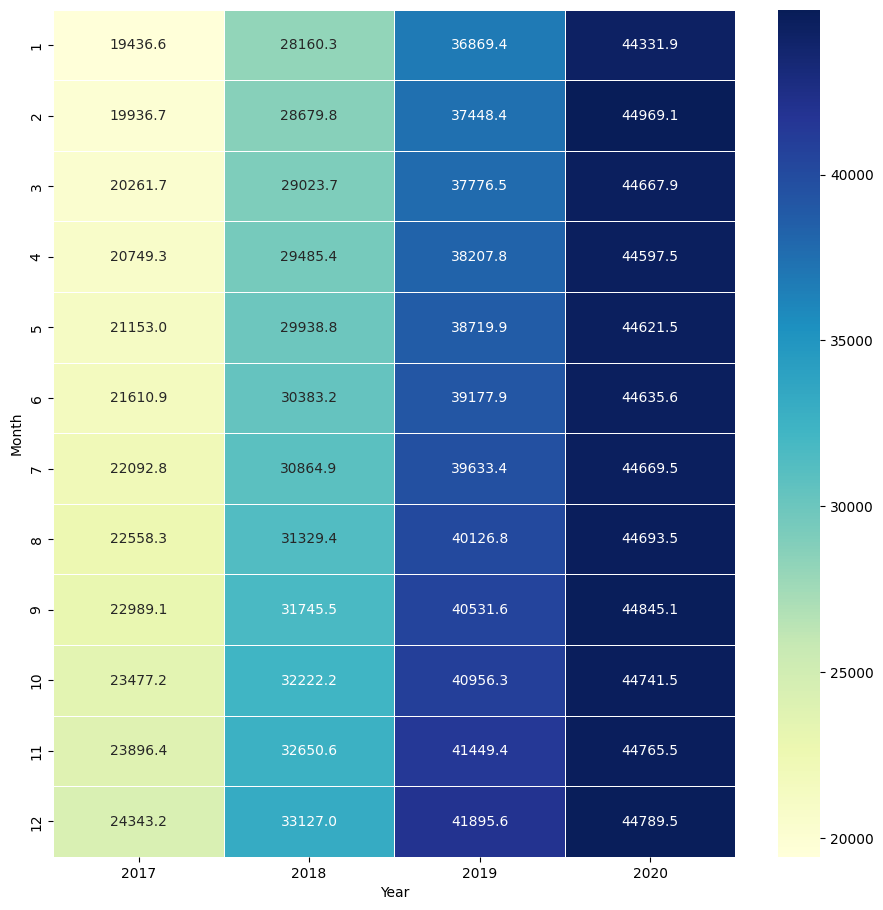

In [17]:
@interact
def get_heatmap(value=num_var_list):
    data[value] = data[value].fillna(0).astype(int)
    temp_pivot = data.pivot_table(index='Month',columns='Year',values=value,aggfunc='mean')
    return explore.heatmap(data=temp_pivot,output_path='./output/',fmt=".1f")

In [18]:
null_values = data.loc[ data["O3_concentration"].isnull()==False]["O3_concentration"]
null_values = pd.to_numeric(null_values,errors='coerce')
# null_values = [float(x) for x in null_values]
null_values.mean()

58.18673507929579

In [19]:
output_data= ms.check_missing(data=data,output_path=r'./output/')
missing_column_names = pd.Series(output_data['total missing']).where(lambda x: x>0).dropna().sort_values(ascending=False).index
clean_data=data.copy()
#.sort_values(ascending=False)
#.filter(like='missing', axis=0)
# output_data.loc(output_data['total missing']>0)
for i in list(missing_column_names):
    data[i] = pd.to_numeric(data[i],errors='coerce')

@interact
def clean_missing_data(condition=['Listwise deletion','Add a variable to denote NA','Arbitrary Value Imputation',
                                  'Mean/Median/Mode Imputation','End of distribution Imputation','Random Sample Imputation']):
    if condition == 'Listwise deletion':    
        clean_data = ms.drop_missing(data=data)
        clean_data.shape
        return clean_data.head(10)
    elif condition == 'Add a variable to denote NA':
        clean_data = ms.add_var_denote_NA(data=data,NA_col=missing_column_names)
        for x in missing_column_names:
            print(clean_data[x].value_counts())
        return clean_data.head(10)
    elif condition == 'Arbitrary Value Imputation':
        clean_data = ms.impute_NA_with_arbitrary(data=data,impute_value=-999,NA_col=missing_column_names)
        return clean_data.head(10)
    
    elif condition == 'Mean/Median/Mode Imputation':
        clean_data = ms.impute_NA_with_avg(data=data,strategy='median',NA_col=missing_column_names)
        return clean_data.head(10)
    elif condition == 'End of distribution Imputation':
        clean_data = ms.impute_NA_with_end_of_distribution(data=data,NA_col=missing_column_names)
        return clean_data.head(10)
    elif condition == 'Random Sample Imputation':
        clean_data = ms.impute_NA_with_random(data=data,NA_col=missing_column_names)
        return clean_data.head(8)
    else:
        return clean_data.head(10)
    




result saved at ./output/ missing.csv


interactive(children=(Dropdown(description='condition', options=('Listwise deletion', 'Add a variable to denot…

In [20]:
clean_data

,ID,Datetime,City_ID,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature,Month,Year
0,0,2017-01-01 14:00:00,0,14.0,40.12,85,600.14,38.55,1024.5,-21.4,0.0,1.15,5.7,62.84,-0.323,1,2017
1,1,2017-01-01 15:00:00,0,12.0,65.59,84,2082.38,96.09,1025.1,-22.1,0.0,2.24,3.9,79.45,-0.570,1,2017
2,2,2017-01-01 16:00:00,0,6.0,58.87,83,1475.88,111.09,1025.3,-24.6,0.0,45.70,5.3,83.44,-1.008,1,2017
3,3,2017-01-01 17:00:00,0,5.0,84.67,84,2448.53,67.59,1026.2,-25.5,0.0,15.90,4.9,81.27,-1.234,1,2017
4,4,2017-01-01 18:00:00,0,5.0,83.66,77,2224.61,95.86,1027.1,-24.5,0.0,31.30,3.2,81.93,-1.704,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,63039,2020-03-13 03:00:00,1,103.0,232.74,128,6075.55,240.01,1004.3,4.4,0.0,60.33,2.1,16.09,26.747,3,2020
55996,63040,2020-03-13 04:00:00,1,75.0,241.44,154,6080.48,254.33,1003.3,4.2,0.0,37.42,2.3,20.69,28.004,3,2020
55997,63041,2020-03-13 05:00:00,1,63.0,220.01,172,5974.36,233.80,1002.6,5.1,0.0,45.96,2.4,26.70,28.215,3,2020
55998,63042,2020-03-13 06:00:00,1,60.0,206.98,170,5741.71,263.99,1002.1,5.9,0.0,42.24,3.2,39.27,27.864,3,2020


In [21]:
pd.Series(clean_data.Temperature.unique()).sort_values()

18373   -16.779
28915   -16.719
18372   -16.718
28914   -16.674
18384   -16.163
          ...  
9545     40.100
24579    40.414
9543     40.433
24580    41.249
9544     41.272
Length: 29689, dtype: float64

In [30]:
data = clean_data.copy()

In [39]:
@interact
def get_outlier_histogram(col=num_var_list):
    n_bins = np.sqrt(len(data[col]))
    n_bins = int(n_bins)
    plt.figure(figsize=(8, 4))
    plt.hist(data[col], bins=n_bins, color='red')
    # plt.title(col)
    plt.xlabel(col)
    plt.show()

interactive(children=(Dropdown(description='col', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_concent…

In [38]:
@interact
def get_outlier_scatter(col=num_var_list):
    integers = range(len(data[col]))
    plt.figure(figsize=(16, 8))
    plt.scatter(integers, data[col], color='red')
    plt.xlabel("count")
    plt.ylabel(col)
    plt.show()

interactive(children=(Dropdown(description='col', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_concent…

### Detect by arbitrary boundary
identify outliers based on arbitrary boundaries

In [22]:

@interact
def get_outlier_detect_arbitrary(col=num_var_list,upper_fence=(1,10,1),lower_fence=(1,10,1)):
    upper_fence_max= data[col].max() * ((100-upper_fence) / 100)
    lower_fence_max= data[col].min() * ((100+lower_fence) / 100)
    index,para = ot.outlier_detect_arbitrary(data=data,col=col,upper_fence=upper_fence_max,lower_fence=lower_fence_max)
    print('Upper bound:',para[0],'\nLower bound:',para[1])
    return data.loc[index,col].sort_values()

interactive(children=(Dropdown(description='col', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_concent…

### IQR method
outlier detection by Interquartile Ranges Rule

In [23]:
@interact
def get_outlier_detect_IQR(col=num_var_list,threshold=(0.1,1,0.1)):
  index,para = ot.outlier_detect_IQR(data=data,col=col,threshold=threshold)
  print('Upper bound:',para[0],'\nLower bound:',para[1])
  print(index)
  return data.loc[index,col].sort_values()

interactive(children=(Dropdown(description='col', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_concent…

### Mean and Standard Deviation Method
outlier detection by Mean and Standard Deviation Method.

In [24]:
@interact
def get_outlier_detect_mean_std(col=num_var_list,threshold=(0.1,1.0,0.1)):
    index,para = ot.outlier_detect_mean_std(data=data,col=col,threshold=threshold)
    print('Upper bound:',para[0],'\nLower bound:',para[1])
    # check the 20 found outliers
    # print(index)
    return data.loc[index,col].sort_values()

interactive(children=(Dropdown(description='col', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_concent…

### MAD method
outlier detection by Median and Median Absolute Deviation Method (MAD)

In [25]:
@interact
def get_outlier_detect_MAD(col=num_var_list,threshold=(0.1,3.0,0.5)):
    # too aggressive for our dataset, about 18% of cases are detected as outliers.
    index = ot.outlier_detect_MAD(data=data,col=col,threshold=threshold)
    
    # return data.loc[index,col].sort_values()
    # return data.loc[index,col].sort_values()
    return index



interactive(children=(Dropdown(description='col', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_concent…

In [56]:
from scipy.stats import zscore
@interact
def get_zscore_outliers(col=num_var_list, threshold=(1,3.5,0.1)):
    z_scores = zscore(data[col])
    abs_z_scores = np.abs(z_scores)
    
    filtered_entries = (abs_z_scores > threshold)
    print(len(data[col][filtered_entries]))
    # print(len(abs_z_scores))
    return data.loc[filtered_entries][col].sort_values()

interactive(children=(Dropdown(description='col', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_concent…

In [58]:
from scipy.stats import median_abs_deviation
@interact
def get_mad_outliers(col=num_var_list, threshold=(1,3.5,0.1)):
    mad = median_abs_deviation(data[col])
    # z_scores = (data[col] - data[col].median()) / mad
    # abs_z_scores = np.abs(z_scores)
    # Reshape sales
    data_reshaped = data[col].values.reshape(-1, 1)
    print(data_reshaped)
    # filtered_entries = (abs_z_scores > threshold)
    # print(len(data[col][filtered_entries]))
    labels = mad.fit_predict(data_reshaped)
    print(labels.sum())
    return data.loc[labels][col].sort_values()

interactive(children=(Dropdown(description='col', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_concent…

### Imputation with arbitrary value
impute outliers with arbitrary value

### Normalization - Standardization (Z-score scaling)
removes the mean and scales the data to unit variance.
z = (X - X.mean) / std

In [26]:
data_ss = data.copy()
@interact
def get_standardization(col=num_var_list):
    ss = StandardScaler().fit(data_ss[[col]])
    data_ss[col + '_zscore'] = ss.transform(data_ss[[col]])
    return data_ss.head(6)[[col,col + '_zscore']]

interactive(children=(Dropdown(description='col', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_concent…

### Min-Max scaling
transforms features by scaling each feature to a given range. Default to [0,1].

X_scaled = (X - X.min / (X.max - X.min)

In [27]:
@interact
def get_MinMaxScaler(col=num_var_list):
    mms = MinMaxScaler().fit(data_ss[[col]])
    data_ss[col +'_minmax'] = mms.transform(data_ss[[col]])
    return data_ss.head(6)[[col,col +'_minmax']]

interactive(children=(Dropdown(description='col', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_concent…

### Robust scaling
removes the median and scales the data according to the quantile range (defaults to IQR)

X_scaled = (X - X.median) / IQR

In [28]:
# add the new created feature
@interact
def get_RobustScaler(col=num_var_list):
    rs = RobustScaler().fit(data_ss[[col]])
    data_ss[col+'_robust'] = rs.transform(data_ss[[col]])
    return data_ss.head(6)[[col,col+'_robust']]

interactive(children=(Dropdown(description='col', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_concent…

### Equal width binning
divides the scope of possible values into N bins of the same width

In [29]:
data_discretion = data.copy()
@interact
def get_KBinsDiscretizer(col=num_var_list,n_bins=(2,10,1),strategy=['uniform','quantile','kmeans']):
    enc = KBinsDiscretizer(n_bins=n_bins,encode='ordinal',strategy=strategy).fit(data_discretion[[col]])
    data_discretion[col+'_kbin'] = enc.transform(data_discretion[[col]])
    return data_discretion.head(10)[[col,col+'_kbin']]
# enc_equal_width = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform').fit(data_discretion[['Fare']])

interactive(children=(Dropdown(description='col', options=('ID', 'City_ID', 'Particulate_matter', 'NO2_concent…

### Equal frequency binning
divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations